# COVID 19 Progression In Italy

In [1]:
import pandas as pd

# Load data provided from Italian government
data_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

data = pd.read_csv(data_url)

# Treat date column as a date object
data["data"] = pd.to_datetime(data["data"])

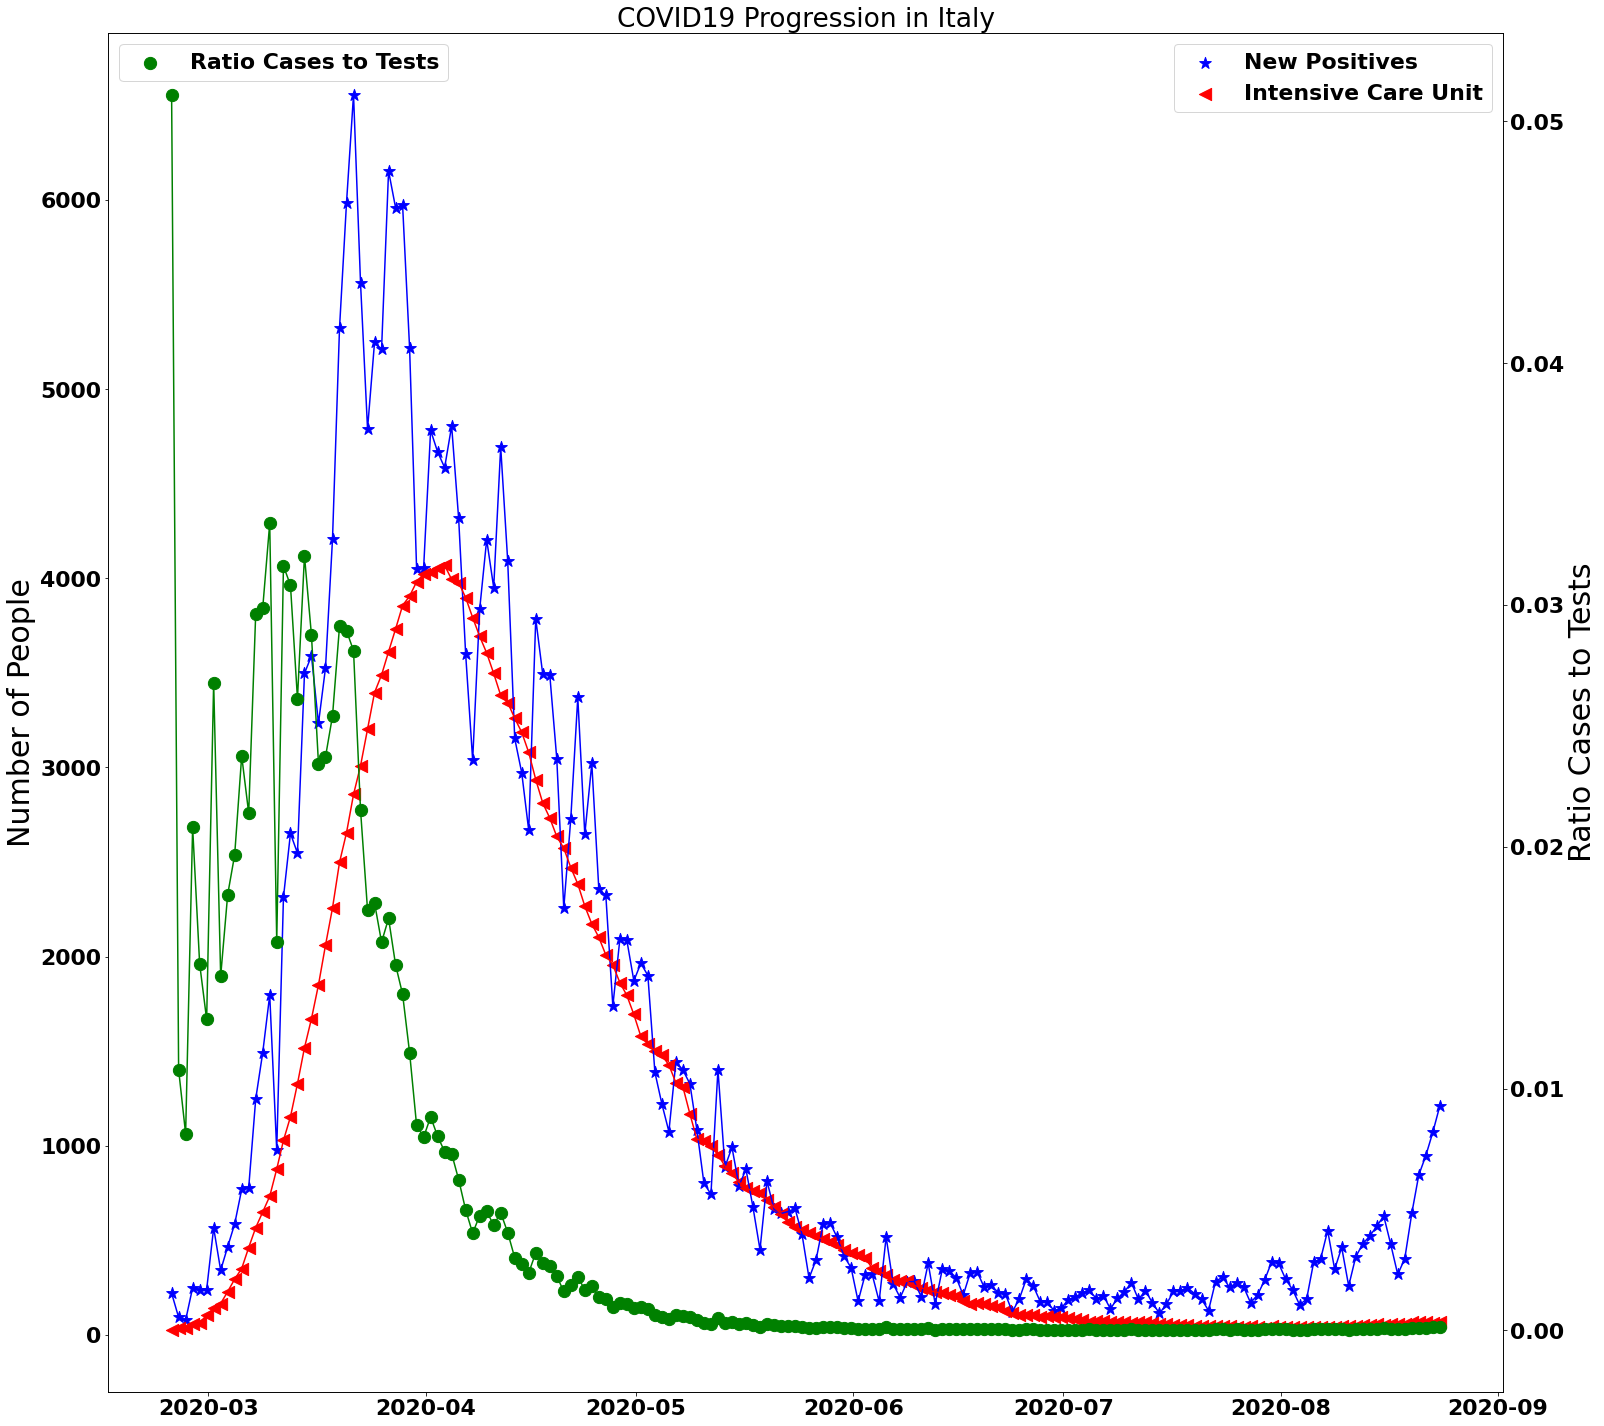

In [2]:
import matplotlib
import matplotlib.pyplot as plt

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

figsize = 25
fontsize = 30

fig, ax1 = plt.subplots(figsize=(figsize, figsize))

marker_size = 150

# Display new positives and ICU
ax1.scatter(data["data"], data["nuovi_positivi"], s=marker_size, marker='*', c='blue', label='New Positives')
ax1.plot(data["data"], data["nuovi_positivi"], c='blue')

ax1.scatter(data["data"], data["terapia_intensiva"], s=marker_size, marker='<', c='red', label='Intensive Care Unit')
ax1.plot(data["data"], data["terapia_intensiva"], c='red')

ax1.set_ylabel("Number of People", fontsize=fontsize)

ax2 = ax1.twinx()

# On a separate y-axis calculate new positives to tests and display it on a separate y-axis
data["rapporto_casi_tamponi"] = data["nuovi_positivi"] / data["tamponi"]

ax2.scatter(data["data"], data["rapporto_casi_tamponi"], s=marker_size, c='green', label='Ratio Cases to Tests')
ax2.plot(data["data"], data["rapporto_casi_tamponi"], c='green')


num_entries = len(data["data"])

ax1.legend()
ax2.legend(loc=2)

ax2.set_ylabel("Ratio Cases to Tests", fontsize=fontsize)

plt.title("COVID19 Progression in Italy")

plt.show()